# EASTWESTAIRLINES DATASET
 Using the EastWestAirlines Dataset to carry out kmeans clustering which will help to understand the different segments of passengers availing the service and identify the customers who will avail a travel award using the rewards and understand the factors responsible for availing the award.

## BUSINESS OBJECTIVE
* Maximize Profits
* Identify Customer Segments
* Maximize Targeted marketing
* Maximize Customer retention
* Maximize Service quality
* Minimize Churn rate
* Minimize Overheads

## CONSTRAINTS
* Fuel Pricing
* Climate Change
* International Politics
* Pandemics
* Economic Situation

## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                                                                                                                                                             | **Type** | **Relevance** |
|:--------:|:---------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
|     1    | ID#                 | Unique   ID                                                                                                                                                                                                                                                 |  Nominal |   Irrelevant  |
|     2    | Balance             | Number of miles eligible for   award travel                                                                                                                                                                                                                 |   Ratio  |    Relevant   |
|     3    | Qual_miles          | Number of miles counted as   qualifying for Topflight status                                                                                                                                                                                                |   Ratio  |    Relevant   |
|     4    | cc1_miles           | Number of miles earned with   freq. flyer credit card in the past 12 months:                                                                                                                                                                                |  Interval |    Relevant   |
|     5    | cc2_miles           | Number of miles earned with   Rewards credit card in the past 12 months:                                                                                                                                                                                    |  Interval |    Relevant   |
|     6    | cc3_miles           | Number of miles earned with   Small Business credit card in the past 12 months:                                                                                                                                                                             |  Interval |    Relevant   |
|          |                     | **Note:**       miles bins:<br> 1 = under 5 000 <br>                             2 = 5,000 - 10,000 <br>                             3 = 10,001 - 25,000 <br>                             4 = 25,001 - 50,000 <br>                             5 = over 50,000  |          |               |
|     7    | Bonus_miles         | Number   of miles earned from non-flight bonus transactions in the past 12 months                                                                                                                                                                           |   Ratio  |    Relevant   |
|     8    | Bonus_trans         | Number of non-flight bonus   transactions in the past 12 months                                                                                                                                                                                             |   Ratio  |    Relevant   |
|     9    | Flight_miles_12mo   | Number of flight miles in the   past 12 months                                                                                                                                                                                                              |   Ratio  |    Relevant   |
|    10    | Flight_trans_12     | Number of flight transactions   in the past 12 months                                                                                                                                                                                                       |   Ratio  |    Relevant   |
|    11    | Days_since_enroll   | Number of days since   Enroll_date                                                                                                                                                                                                                          |   Ratio  |    Relevant   |
|    12    | Award?              | Dummy variable for award claimed  (1=claimed, 0= not claimed)                                                                                                                                                                                               |  Binary  |    Relevant   |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from feature_engine.outliers import Winsorizer

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
xls = pd.ExcelFile(r"D:\360Digitmg\ASSIGNMENTS\Ass6\EastWestAirlines.xlsx")
df0 = pd.read_excel(xls, 'data')
df=df0.copy()
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(3999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Checking the Number of Duplicates in the Dataset.

In [6]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number of Missing Values in the Dataset.

In [7]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [8]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [9]:
df.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

In [10]:
df.median()

ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

In [11]:
stats.mode(df)

ModeResult(mode=array([[   1, 1000,    0,    1,    1,    1,    0,    0,    0,    0, 8296,
           0]], dtype=int64), count=array([[   1,   10, 3773, 2289, 3956, 3981,  475,  475, 2723, 2723,   38,
        2518]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [12]:
df.var()

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

In [13]:
df.std()

ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64

In [14]:
Range=df.max()-df.min()
Range

ID#                     4020
Balance              1704838
Qual_miles             11148
cc1_miles                  4
cc2_miles                  2
cc3_miles                  4
Bonus_miles           263685
Bonus_trans               86
Flight_miles_12mo      30817
Flight_trans_12           53
Days_since_enroll       8294
Award?                     1
dtype: int64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_3092\450075145.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

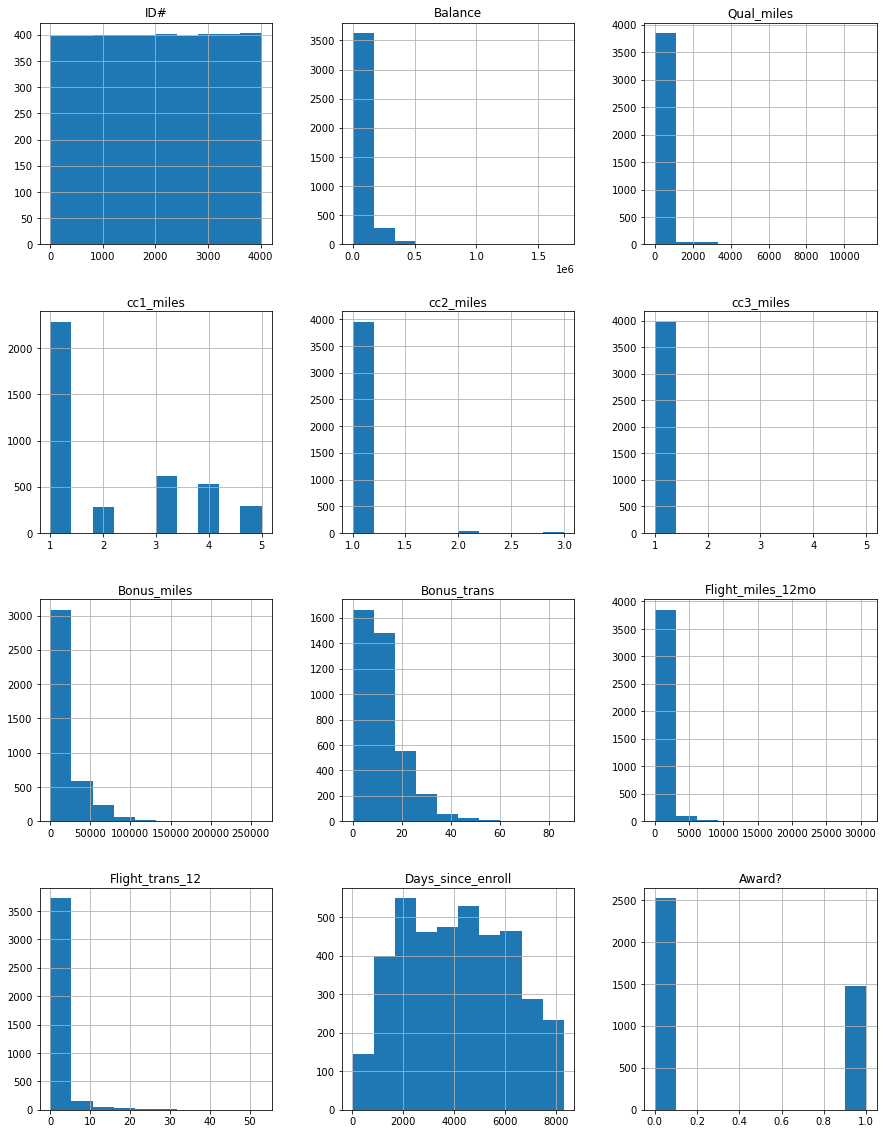

In [17]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


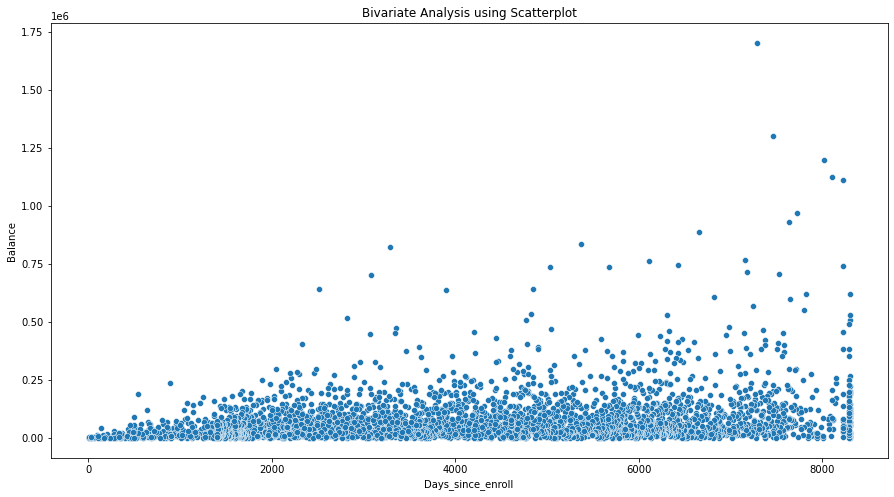

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Days_since_enroll,df.Balance)
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

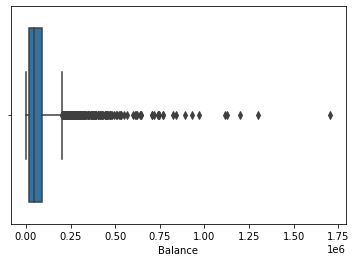

In [19]:
sns.boxplot(df['Balance'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus_miles'>

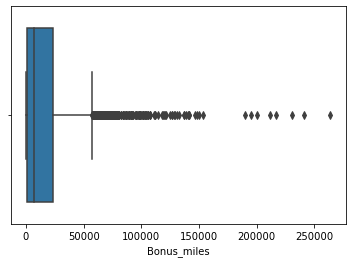

In [20]:
sns.boxplot(df['Bonus_miles'])

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [21]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [22]:
sum(outlier_func(df['Balance']))

266

In [23]:
sum(outlier_func(df['Bonus_miles']))

280

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [24]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Balance'])

df['Balance']= winsor.fit_transform(df[['Balance']])
sum(outlier_func(df['Balance']))

0

In [25]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Bonus_miles'])

df['Bonus_miles']= winsor.fit_transform(df[['Bonus_miles']])
sum(outlier_func(df['Bonus_miles']))

0

Again plotting boxplots

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

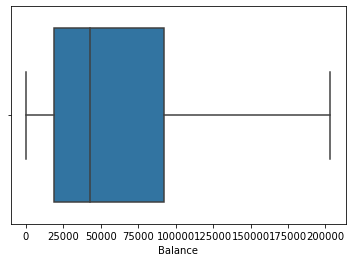

In [26]:
sns.boxplot(df['Balance'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus_miles'>

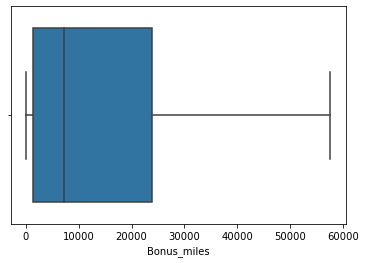

In [27]:
sns.boxplot(df['Bonus_miles'])

Renaming the column names of ID# and Award? to ID and Award_Claimed

In [28]:
df.rename(columns={'ID#':'ID','Award?':'Award_Claimed'},inplace=True)

In [29]:
df.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0


The ID column is not relevant for clustering so removing it to get better clustering

In [41]:
df1=df.drop(['ID'],axis=1)
df1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
0,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,19244.0,0,1,1,1,215.0,2,0,0,6968,0


Before Clustering the dataset is scaled using standardization or normalization, so have tried both normalization and standardization both.

## NORMALIZATION

Using the MinMaxScaler from sklearn.preprocessing library we do normalization and from the descriptive statistics we can see that the values are between 0 and 1.

In [42]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df1),columns=df1.columns,index=df1.index)
df_minmax.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
0,0.138486,0.0,0.0,0.0,0.0,0.003019,0.011628,0.0,0.0,0.843742,0.0
1,0.094696,0.0,0.0,0.0,0.0,0.003731,0.023256,0.0,0.0,0.839884,0.0


In [43]:
df_minmax.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.313793,0.012927,0.264879,0.007252,0.003063,0.267426,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288722,0.069399,0.344230,0.073825,0.048810,0.313655,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091170,0.000000,0.000000,0.000000,0.000000,0.021692,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.212072,0.000000,0.000000,0.000000,0.000000,0.124440,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.454702,0.000000,0.500000,0.000000,0.000000,0.413015,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.


In [44]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_minmax)
    TWSS.append(kmeans.inertia_)
TWSS

[1437.101027042839,
 1035.8979709105479,
 781.3487377680128,
 690.7193193619079,
 627.7822161954792,
 559.7840441650552,
 502.9729263820304]

Text(0, 0.5, 'Total within SS')

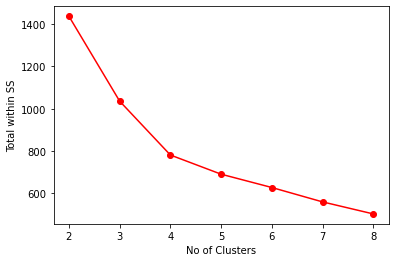

In [45]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the scree plot 4 clusters seems to be the optimum number of clusters but considering both 3 and 4 clusters to get a better idea.

### NO OF CLUSTERS : 3

In [46]:
model=KMeans(n_clusters=3)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_minmax3= df.copy()
df_minmax3['clust']=mb
df_minmax3.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed,clust
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0,0
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0,0
2,3,41354.0,0,1,1,1,4123.0,4,0,0,7034,0,0


In [47]:
df_minmax3.groupby(['clust']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226
1,849,849,849,849,849,849,849,849,849,849,849,849
2,924,924,924,924,924,924,924,924,924,924,924,924


In [48]:
df_minmax3.groupby(['clust']).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,2239.783019,45734.542565,85.185984,1.378706,1.015274,1.003594,5612.105683,7.853549,215.197664,0.625786,3695.276730,0.000000
1,1538.878681,113034.837750,169.771496,4.273263,1.001178,1.045936,45492.765607,20.958775,716.914016,2.096584,4991.210836,0.656066
2,1910.170996,61947.083874,262.504329,1.665584,1.024892,1.002165,11376.197781,12.034632,813.931818,2.510823,4336.466450,1.000000


Text(0, 0.5, 'Balance')

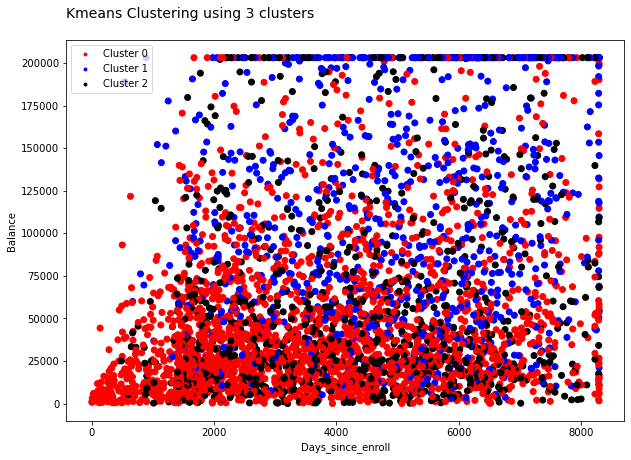

In [61]:
plt.figure(figsize=(10,7))
a4 = df_minmax3.clust.map({0:'red', 1:'blue', 2:'black'})
plt.scatter(df_minmax3['Days_since_enroll'],df_minmax3['Balance'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xlabel('Days_since_enroll')
plt.ylabel('Balance')

#### INSIGHTS
* Cluster 0 : This group of passengers have been enrolled for comparitively less days and none of the passengers have ever claimed travel awards. The transactions and miles eligible for travel awards are also low.
* Cluster 1 : This group of passengers have been enrolled for the longest time and most of the passengers have claimed travel awards. The transactions and miles eligible for travel awards are also the highest
* Cluster 2 : This group of passengers have also been enrolled for long and all the passengers have claimed travel awards. The transactions and miles eligible for travel awards are also the second highest.

### NO OF CLUSTERS : 4

In [49]:
model=KMeans(n_clusters=4)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_minmax4= df.copy()
df_minmax4['clust']=mb
df_minmax4.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed,clust
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0,1
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0,1
2,3,41354.0,0,1,1,1,4123.0,4,0,0,7034,0,1


In [50]:
df_minmax4.groupby(['clust']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,893,893,893,893,893,893,893,893,893,893,893,893
1,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886
2,632,632,632,632,632,632,632,632,632,632,632,632
3,588,588,588,588,588,588,588,588,588,588,588,588


In [51]:
df_minmax4.groupby(['clust']).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,1931.881299,60963.824188,259.634938,1.619261,1.023516,1.002240,10783.047312,11.776036,789.889138,2.437850,4300.517357,1.0
1,2301.172853,37762.892762,78.425239,1.102333,1.018028,1.000530,3160.987275,6.439024,223.733298,0.650053,3584.282609,0.0
2,1791.183544,110779.023339,114.988924,3.504747,1.001582,1.033228,30205.602848,17.212025,233.928797,0.659810,4526.020570,0.0
3,1462.675170,100913.130952,210.675170,4.244898,1.003401,1.042517,45827.700255,21.867347,960.183673,2.845238,5117.950680,1.0


Text(0, 0.5, 'Balance')

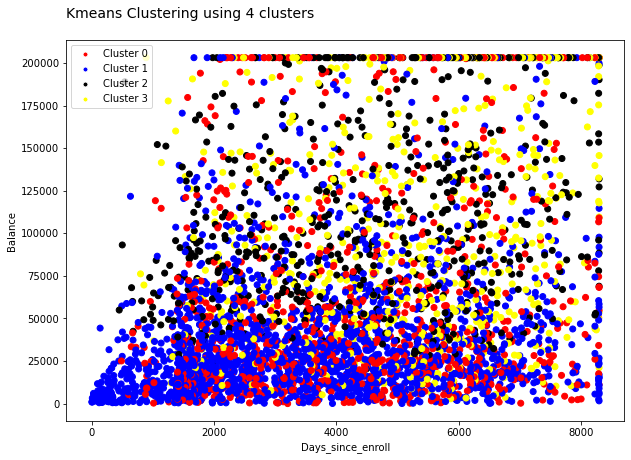

In [62]:
plt.figure(figsize=(10,7))
a4 = df_minmax4.clust.map({0:'red', 1:'blue', 2:'black',3:'yellow'})
plt.scatter(df_minmax4['Days_since_enroll'],df_minmax4['Balance'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xlabel('Days_since_enroll')
plt.ylabel('Balance')

#### INSIGHTS
* Cluster 0 : This group of passengers have been enrolled for the second lowest days and all the passengers have claimed the travel awards. They also have second lowest non flight bonus transactions and a higher flight bonus transaction. The miles eligible for travel awards is also low. 
* Cluster 1 : This group of passengers have been enrolled for the least number of days and none of the passengers have claimed the travel awards. They have the lowest number of transactions and miles eligible for travel awards.  
* Cluster 2 : This group of passengers have been enrolled for a longer time and none of the passengers have claimed the travel awards. They have a higher transaction number and the most number of miles eligible for travel awards
* Cluster 3 : This group of passengers have been enrolled for the longest days and all the passengers have claimed the travel awards. They also have have the highest transactions and second highest miles eligible for travel awards.

## STANDARDIZATION

In [52]:
from sklearn.preprocessing import StandardScaler
stdscaled=StandardScaler()
df_stdscaled=pd.DataFrame(stdscaled.fit_transform(df1),columns=df1.columns,index=df1.index)
df_stdscaled.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
0,-0.607258,-0.186299,-0.769578,-0.098242,-0.062767,-0.843091,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.758947,-0.186299,-0.769578,-0.098242,-0.062767,-0.840822,-0.999926,-0.328603,-0.362168,1.379957,-0.766919


In [53]:
df_stdscaled.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,1.642986e-16,-7.588884e-17,9.288838e-15,-7.447781e-16,-4.371208e-16,2.089823e-15,-2.877696e-15,5.781822e-16,-1.206323e-15,1.406727e-15,-3.352657e-15
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.086971e+00,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-8.527184e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-7.711597e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.835524e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.523592e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.559271e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,4.881053e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,4.642292e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01,1.303918e+00
max,2.377003e+00,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,2.335902e+00,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00,1.303918e+00


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [54]:
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_stdscaled)
    TWSS.append(kmeans.inertia_)
TWSS

[34483.1493238089,
 29976.985627754133,
 26284.52014230109,
 22830.983172516284,
 20859.218226641933,
 17970.825859721346,
 16414.23654818784]

Text(0, 0.5, 'Total within SS')

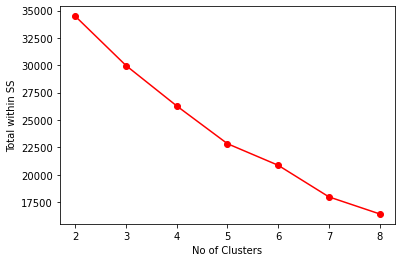

In [55]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the above scree plot 5 clusters seemed to be the most optimum for the standardised data.

### NO OF CLUSTERS : 5

In [57]:
model=KMeans(n_clusters=5)
model.fit(df_stdscaled)
model.labels_
mb=pd.Series(model.labels_)
df_stdscaled5= df.copy()
df_stdscaled5['clust']=mb
df_stdscaled5.head(3)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed,clust
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0,1
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0,1
2,3,41354.0,0,1,1,1,4123.0,4,0,0,7034,0,1


In [58]:
df_stdscaled5.groupby(['clust']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,63,63,63,63,63,63,63,63,63,63,63,63
1,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474
2,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302
3,145,145,145,145,145,145,145,145,145,145,145,145
4,15,15,15,15,15,15,15,15,15,15,15,15


In [59]:
df_stdscaled5.groupby(['clust']).mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award_Claimed
clust,,,,,,,,,,,,
0,2039.476190,101354.174603,5266.063492,1.984127,1.000000,1.000000,17335.892857,12.079365,933.047619,2.777778,4007.444444,0.555556
1,2241.628537,39960.622474,40.953921,1.200081,1.020210,1.000404,4391.092967,6.827001,195.173808,0.610752,3695.314875,0.210994
2,1613.768817,100565.115975,60.934716,3.665899,1.001536,1.001536,34617.835253,18.613671,353.536866,1.050691,4864.369432,0.614439
3,1771.634483,119244.653448,432.503448,2.186207,1.041379,1.000000,25979.870690,28.200000,5725.627586,16.655172,4640.165517,0.800000
4,1664.866667,102441.716667,78.800000,3.466667,1.000000,4.066667,55485.600000,28.066667,506.666667,1.600000,4613.866667,0.533333


Text(0, 0.5, 'Balance')

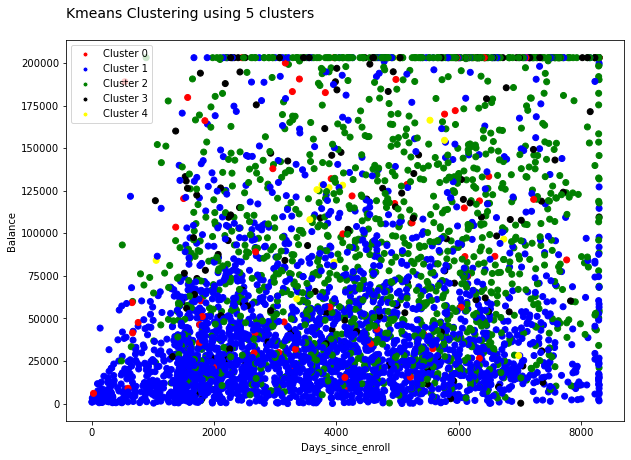

In [60]:
plt.figure(figsize=(10,7))
a4 = df_stdscaled5.clust.map({0:'red', 1:'blue', 2:'green',3:'black',4:'yellow'})
plt.scatter(df_stdscaled5['Days_since_enroll'],df_stdscaled5['Balance'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','green','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 5 clusters\n', loc='left', fontsize=14)
plt.xlabel('Days_since_enroll')
plt.ylabel('Balance')

#### INSIGHTS
* As the data in some of the clusters was very low and in some are very couldn't get any useful insights from the above clustering of the standardized data.

## CONCLUSION
From the above insights the 4 clusters of normalised data were very helpful to draw inferences  so decided to  group customers in to Four passenger groups:
* __Low Balance and Low Claim__ : This group consists of passengers with low balance of miles eligible for travel awards and low claim of travel awards.

*  __Low Balance and High Claim__ : This group consists of passengers with low balance of miles eligible for travel awards and high claim of travel awards.

* __High Balance and Low Claim__ : This group consists of passengers with high balance of miles eligible for travel awards and low claim of travel awards.

* __High Balance and High Claim__ : This group consists of passengers with high balance of miles eligible for travel awards and high claim of travel awards.

### BENEFIT
From the above analysis of the passenger segments we can benefit if we do the following
* Reduce the churn rate of high balance and low claim customers by improving and maintaining the quality of service
* Implement targeted marketing tactics to have more high balance and low claim passengers.